In [315]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report

In [153]:
house_df = pd.read_csv("CSV_data/london_houses.csv")

In [60]:
house_df.head()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


In [61]:
print("Missing data")
print(house_df.isna().sum())

Missing data
Address            0
Neighborhood       0
Bedrooms           0
Bathrooms          0
Square Meters      0
Building Age       0
Garden             0
Garage             0
Floors             0
Property Type      0
Heating Type       0
Balcony            0
Interior Style     0
View               0
Materials          0
Building Status    0
Price              0
dtype: int64


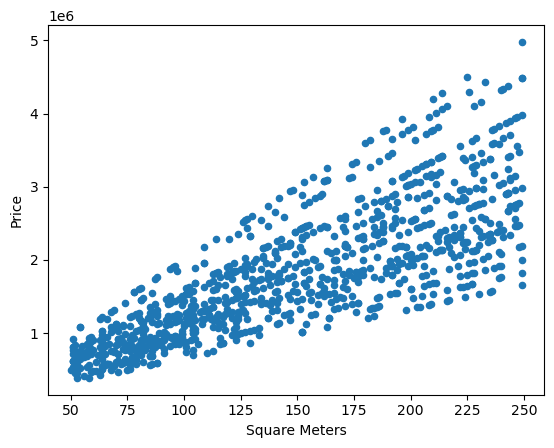

In [63]:
house_df.plot.scatter(x="Square Meters", y="Price")
plt.show()

In [79]:
print("Linear regression with one variable : square meters - price")
X = house_df["Square Meters"].values
X = X.reshape(-1,1)
y = house_df["Price"].values

Linear regression with one variable : square meters - price


In [81]:
reg = LinearRegression()
reg.fit(X,y)
prediction = reg.predict(X)

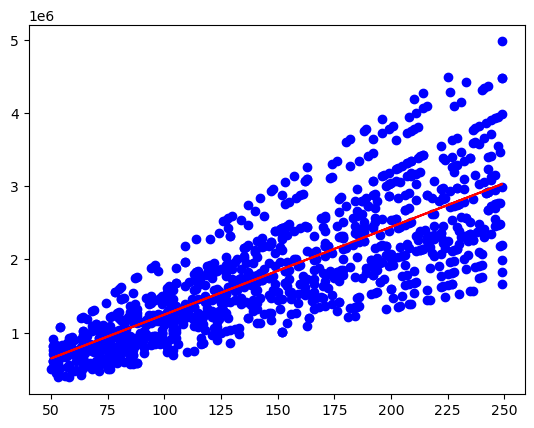

In [87]:
plt.scatter(X, y, color="blue")
plt.plot(X, prediction, color="red")
plt.show()

In [99]:
print("Fit score")
print(reg.score(X,y))
print("Coefficients")
print(reg.coef_)
print(reg.intercept_)

Fit score
0.6251300307595498
Coefficients
[11975.60751862]
48933.05181095633


In [105]:
print("Linear regression with many variables")
print("Analysis of unique variables")
print(house_df["Building Status"].unique())
print(house_df["Materials"].unique())
print(house_df["View"].unique())
print(house_df["Interior Style"].unique())
print(house_df["Balcony"].unique())
print(house_df["Heating Type"].unique())
print(house_df["Property Type"].unique())
print(house_df["Garage"].unique())
print(house_df["Garden"].unique())

Linear regression with many variables
Analysis of unique variables
['Renovated' 'Old' 'New']
['Marble' 'Laminate Flooring' 'Wood' 'Granite']
['Garden' 'City' 'Street' 'Park' 'Sea']
['Industrial' 'Classic' 'Modern' 'Minimalist']
['High-level Balcony' 'No Balcony' 'Low-level Balcony']
['Electric Heating' 'Central Heating' 'Underfloor Heating' 'Gas Heating']
['Semi-Detached' 'Apartment' 'Detached House']
['No' 'Yes']
['No' 'Yes']


In [121]:
print("In order to limit the list of categorical data, the following columns are going to be neglected:")
print("Materials, View, Balcony, Heating Type\n")
print("The remaining categorical columns are going to be encoded:")
print("Building Status, Interior Style, Property Type, Garage, Garden")

In order to limit the list of categorical data, the following columns are going to be neglected:
Materials, View, Balcony, Heating Type

The remaining categorical columns are going to be encoded:
Building Status, Interior Style, Property Type, Garage, Garden


In [155]:
house_df = house_df.drop(["Materials", "View", "Balcony", "Heating Type"], axis=1)
categorical_columns = ["Building Status", "Interior Style", "Property Type", "Garage", "Garden"]
ohe = OneHotEncoder(sparse_output=False)
encoded = ohe.fit_transform(house_df[categorical_columns])
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(categorical_columns))
house_encoded = pd.concat([house_df, encoded_df], axis=1)
house_encoded = house_encoded.drop(categorical_columns, axis=1)
house_encoded.head()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Floors,Price,Building Status_New,Building Status_Old,...,Interior Style_Industrial,Interior Style_Minimalist,Interior Style_Modern,Property Type_Apartment,Property Type_Detached House,Property Type_Semi-Detached,Garage_No,Garage_Yes,Garden_No,Garden_Yes
0,78 Regent Street,Notting Hill,2,3,179,72,3,2291200,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,198 Oxford Street,Westminster,2,1,123,34,1,1476000,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,18 Regent Street,Soho,5,3,168,38,3,1881600,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,39 Piccadilly Circus,Islington,5,1,237,53,1,1896000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,116 Fleet Street,Marylebone,4,1,127,23,2,1524000,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [157]:
print(house_encoded.columns)

Index(['Address', 'Neighborhood', 'Bedrooms', 'Bathrooms', 'Square Meters',
       'Building Age', 'Floors', 'Price', 'Building Status_New',
       'Building Status_Old', 'Building Status_Renovated',
       'Interior Style_Classic', 'Interior Style_Industrial',
       'Interior Style_Minimalist', 'Interior Style_Modern',
       'Property Type_Apartment', 'Property Type_Detached House',
       'Property Type_Semi-Detached', 'Garage_No', 'Garage_Yes', 'Garden_No',
       'Garden_Yes'],
      dtype='object')


In [185]:
Xenc = house_encoded[['Bedrooms', 'Bathrooms', 'Square Meters', 'Building Age', 'Floors', 'Building Status_New',
                      'Building Status_Old', 'Building Status_Renovated', 'Interior Style_Classic', 'Interior Style_Industrial',
                      'Interior Style_Minimalist', 'Interior Style_Modern','Property Type_Apartment', 'Property Type_Detached House',
                      'Property Type_Semi-Detached', 'Garage_No', 'Garage_Yes', 'Garden_No','Garden_Yes']].values
yenc = house_encoded[['Price']]

In [303]:
X_train, X_test, y_train, y_test = train_test_split(Xenc, yenc, test_size=0.3, random_state=11)
reg.fit(X_train,y_train)
prediction = reg.predict(X_test)

In [305]:
print("Prediction: \n{}, \nActual value {}".format(prediction[:4], y_test[:4]))

Prediction: 
[[2365698.50133428]
 [3204458.72141329]
 [2708857.86787757]
 [ 955765.00965919]], 
Actual value        Price
25   2898000
464  2240000
372  1826000
730  1373333


In [311]:
print("R-squared")
print(reg.score(X_test, y_test))
#print("Matrix")
#print(confusion_matrix(y_test, prediction))
#print("Report")
#print(classification_report(y_test, prediction))

R-squared
0.7059694685954108


In [255]:
print("10-folds cross validation of the model")

10-folds cross validation of the model


In [261]:
kf = KFold(n_splits=10, shuffle=True, random_state=10)
cv_scores = cross_val_score(reg, Xenc, yenc, cv=kf)

In [267]:
print("R-squared after cross validation:")
print(cv_scores)
print("The best score")
print(cv_scores.max())

R-squared after cross validation:
[0.73890838 0.67195772 0.7858155  0.77100436 0.73953464 0.65916243
 0.77297406 0.72516834 0.69990051 0.73307929]
The best score
0.7858155003451212


In [269]:
print("Regularized regression Ridge")

Regularized regression Ridge


In [273]:
alphas = [0.1, 1, 10, 100]
ridge_scores = []

for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    score = ridge.score(X_test, y_test)
    ridge_scores.append(score)

In [275]:
print("Scores from Ridge regression")
print(ridge_scores)

Scores from Ridge regression
[0.7059863666037934, 0.7061355334872617, 0.707360319344735, 0.7057418609102948]


In [277]:
print("Regularized regression Lasso")

Regularized regression Lasso


In [327]:
# lasso = Lasso(alpha = 0.3)
# lasso.fit(X_train, y_train)
# score = lasso.score(X_test, y_test)
# coef = lasso.coef_
print("Lack of convergence in Lasso model")

Lack of convergence in Lasso model


In [329]:
# param_grid = {"alpha": np.linspace(0.00001, 1, 20)}
# lasso = Lasso()
# lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)
# lasso_cv.fit(X_train, y_train)
# print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
# print("Tuned lasso score: {}".format(lasso_cv.best_score_))
print("Convergence found only for alpha=1.0 with score 0.7312")

Convergence found only for alpha=1.0 with score 0.7312
